# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
cast = pd.read_csv('cast.csv')

In [4]:
titles = pd.read_csv('titles.csv')

In [5]:
release_dates = pd.read_csv('release_dates.csv')

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

The Cast data seems to be the largest of the 3 which gives details about the cast of movies ranging from 1900s to 2000s like name of actor, character name, year of release etc. The release_dates data gives the date of release of all movies along with the country of the release. The titles data shows the titles of movies along with their year of release.

In [6]:
len_cast = len(cast)
len_titles = len(titles)
len_release_dates = len(release_dates)

print("Length of cast DataFrame:", len_cast)
print("Length of titles DataFrame:", len_titles)
print("Length of release_dates DataFrame:", len_release_dates)

Length of cast DataFrame: 3442902
Length of titles DataFrame: 226013
Length of release_dates DataFrame: 443486


In [7]:
count_cast = cast.count()
count_titles = titles.count()
count_release_dates = release_dates.count()

print("Count of non-null values in cast DataFrame:")
print(count_cast)
print("\nCount of non-null values in titles DataFrame:")
print(count_titles)
print("\nCount of non-null values in release_dates DataFrame:")
print(count_release_dates)

Count of non-null values in cast DataFrame:
title        3442902
year         3442902
name         3442902
type         3442902
character    3442902
n            2115119
dtype: int64

Count of non-null values in titles DataFrame:
title    226013
year     226013
dtype: int64

Count of non-null values in release_dates DataFrame:
title      443486
year       443486
country    443486
date       443486
dtype: int64


In [8]:
size_cast = cast.size
size_titles = titles.size
size_release_dates = release_dates.size

print("Size of cast DataFrame:", size_cast)
print("Size of titles DataFrame:", size_titles)
print("Size of release_dates DataFrame:", size_release_dates)

Size of cast DataFrame: 20657412
Size of titles DataFrame: 452026
Size of release_dates DataFrame: 1773944


In [15]:
cast['n'].isnull().sum()

1327783

In [9]:
describe_cast = cast.describe()
describe_titles = titles.describe()
describe_release_dates = release_dates.describe()

print("Summary statistics for cast DataFrame:")
print(describe_cast)
print("\nSummary statistics for titles DataFrame:")
print(describe_titles)
print("\nSummary statistics for release_dates DataFrame:")
print(describe_release_dates)

Summary statistics for cast DataFrame:
               year             n
count  3.442902e+06  2.115119e+06
mean   1.987597e+03  1.673178e+01
std    2.837612e+01  3.209100e+01
min    1.894000e+03  1.000000e+00
25%    1.967000e+03  5.000000e+00
50%    1.999000e+03  1.000000e+01
75%    2.011000e+03  2.100000e+01
max    2.115000e+03  3.361300e+04

Summary statistics for titles DataFrame:
                year
count  226013.000000
mean     1985.281294
std        29.816257
min      1894.000000
25%      1965.000000
50%      1994.000000
75%      2011.000000
max      2115.000000

Summary statistics for release_dates DataFrame:
                year
count  443486.000000
mean     1985.554863
std        28.373819
min      1894.000000
25%      1964.000000
50%      1997.000000
75%      2010.000000
max      2115.000000


In [29]:
info_cast = cast.info()
info_titles = titles.info()
info_release_dates = release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226013 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443486 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non

In [11]:
release_dates.head(10)

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
5,#Lucky Number,2015,USA,2015-09-01
6,#Nerealnaya lyubov,2014,Russia,2014-02-13
7,#Pellichoopulu,2016,India,2016-07-29
8,#REALITYHIGH,2017,USA,2017-09-08
9,#Selfi,2017,Russia,2018-02-01


In [10]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [32]:
titles.head(10)

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993
5,Ostatnia misja,2000
6,Physics and the Pinewood Derby,2008
7,Duffy of San Quentin,1954
8,Pinsky,2017
9,Luang phii theng III,2010


### 2. How many movies have the title North by Northwest

1 movie has the title North by Northwest

In [33]:
titles[titles['title'].str.contains ("North by Northwest")].count()

title    1
year     1
dtype: int64

### 3. How many version of Hamlet are there, when was the first made? the last?

In [6]:
titles[titles['title'].str.contains ("Hamlet")].count()

title    55
year     55
dtype: int64

There are 55 versions of Hamlet

In [14]:
first_hamlet = titles[titles['title'] == 'Hamlet'].sort_values('year').iloc[0]

print("First Hamlet movie was made in:", first_hamlet['year'])

last_hamlet = titles[titles['title'] == 'Hamlet'].sort_values('year', ascending=False).iloc[0]

print("Last Hamlet movie was made in:", last_hamlet['year'])

First Hamlet movie was made in: 1910
Last Hamlet movie was made in: 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [15]:
treasure_island_movies = titles[titles['title'] == 'Treasure Island'].sort_values('year')

print(treasure_island_movies)

                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [16]:
movies_1950 = titles[titles['year'] == 1950].shape[0]

print("Number of movies made in 1950:", movies_1950)

movies_1980 = titles[titles['year'] == 1980].shape[0]

print("Number of movies made in 1980:", movies_1980)

movies_2000 = titles[titles['year'] == 2000].shape[0]

print("Number of movies made in 2000:", movies_2000)

Number of movies made in 1950: 1109
Number of movies made in 1980: 1750
Number of movies made in 2000: 2568


The number of movies made have increased over the given years by more than 50% on an average owing to higher demand for entertainment.

### 6. How big was the cast of Metropolis


In [21]:
metropolis_cast = cast[(cast['title'] == 'Metropolis')]

cast_size_metropolis = metropolis_cast.shape[0]

print("The size of the cast for the movie 'Metropolis' is:", cast_size_metropolis)

The size of the cast for the movie 'Metropolis' (1927) is: 33


### 7. How many roles for actors were there 1950's? 1990's

In [5]:
def map_to_decade(year):
    return str(year // 10 * 10) + "s"

cast['decade'] = cast['year'].apply(map_to_decade)

# Filter the DataFrame for the 1950 decade
cast_1950s = cast[cast['decade'] == '1950s']

distinct_character_counts_1950s = cast_1950s['character'].nunique()

print("Count of distinct number of characters for the 1950 decade:", distinct_character_counts_1950s)

Count of distinct number of characters for the 1950 decade: 124490


In [6]:
def map_to_decade(year):
    return str(year // 10 * 10) + "s"

cast['decade'] = cast['year'].apply(map_to_decade)

cast_1990s = cast[cast['decade'] == '1990s']

distinct_character_counts_1990s = cast_1990s['character'].nunique()

print("Count of distinct number of characters for the 1990 decade:", distinct_character_counts_1990s)

Count of distinct number of characters for the 1990 decade: 191079


### 8. How many roles for actors & actresses over time? Output should be a line graph

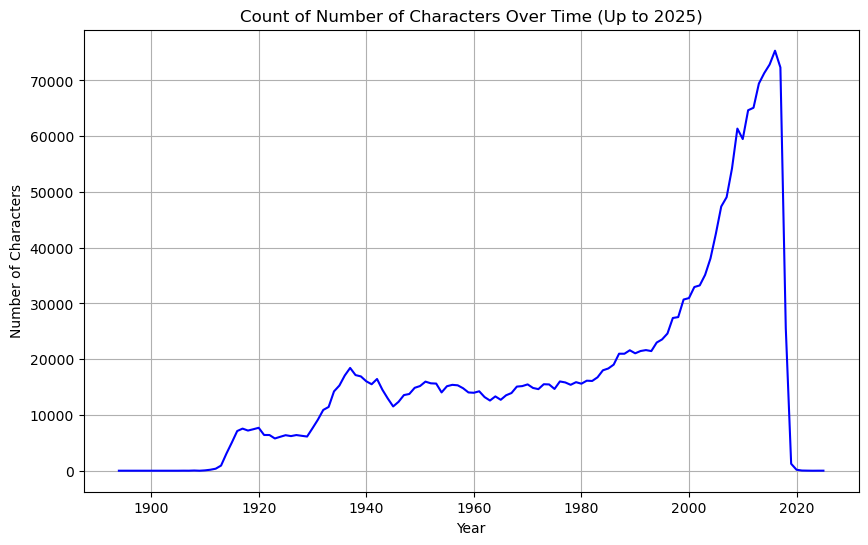

In [28]:
cast_filtered = cast[cast['year'] <= 2025]

character_count_by_year = cast_filtered.groupby('year')['character'].nunique()

plt.figure(figsize=(10, 6))
character_count_by_year.plot(kind='line', color='blue')
plt.title('Count of Number of Characters Over Time (Up to 2025)')
plt.xlabel('Year')
plt.ylabel('Number of Characters')
plt.grid(True)
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [7]:
def map_to_decade(year):
    return str(year // 10 * 10) + "s"

cast['decade'] = cast['year'].apply(map_to_decade)

cast_2000s = cast[(cast['decade'] == '2000s')]


cast_2000s_one_character = cast_2000s[cast_2000s['n'] == 1]


type_counts_2000s_one_character = cast_2000s_one_character['n'].value_counts()

print("Count of values in the 'type' column for the 2000 decade with number of characters equal to 1:")
print(type_counts_2000s_one_character)

Count of values in the 'type' column for the 2000 decade with number of characters equal to 1:
1.0    23593
Name: n, dtype: int64


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [13]:
cast_2000s = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009)]

null_count_2000s = cast_2000s['n'].isnull().sum()

print("Number of null values in the 'number of characters' column for the 2000 decade:", null_count_2000s)

Number of null values in the 'number of characters' column for the 2000 decade: 232037


In [12]:
cast_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

null_count_1950s = cast_1950s['n'].isnull().sum()

print("Number of null values in the 'number of characters' column for the 1950 decade:", null_count_1950s)

Number of null values in the 'number of characters' column for the 1950 decade: 95406


Earlier there were lesser roles that did not have a ranking which also means that the cast size used to be smaller. Now in the 2000s there is a higher number of roles that do not have a ranking also meaning that the cast sizes for a movie have increased drastically.

### 11. Plot the number of films made in each decade

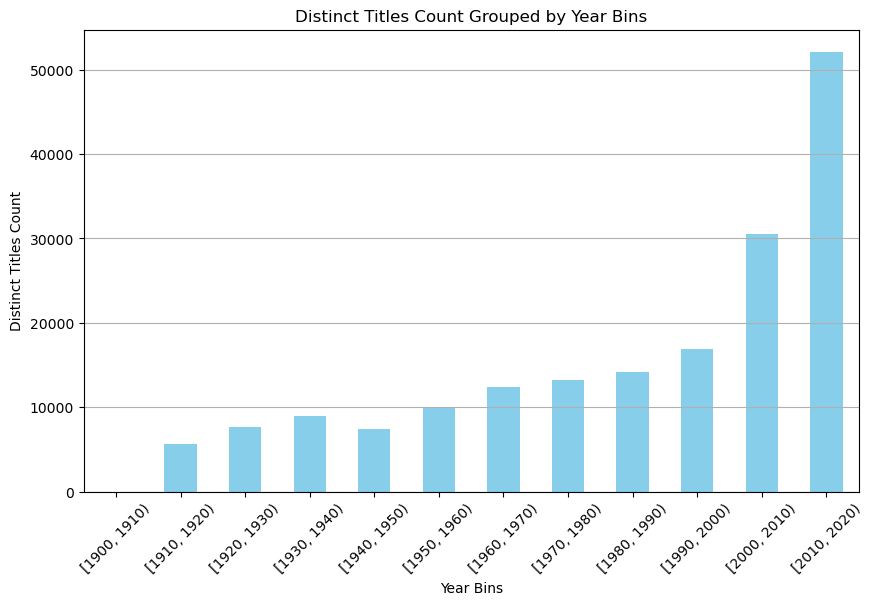

In [33]:
cast['year_bins'] = pd.cut(cast['year'], bins=range(1900, 2030, 10), right=False)
title_counts_by_year_bins = cast.groupby('year_bins')['title'].nunique()

plt.figure(figsize=(10, 6))
title_counts_by_year_bins.plot(kind='bar', color='skyblue')
plt.title('Distinct Titles Count Grouped by Year Bins')
plt.xlabel('Year Bins')
plt.ylabel('Distinct Titles Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 12. Plot the number of films with a Rustler character over time

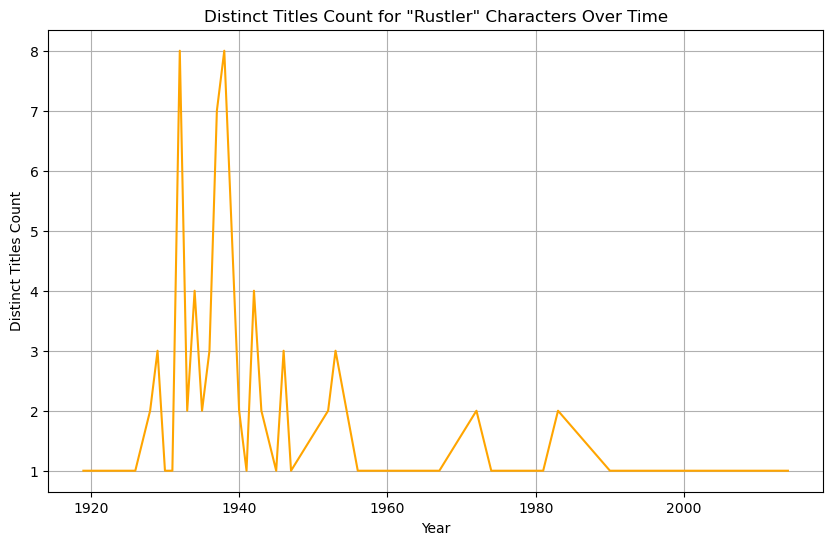

In [36]:

rustler_cast = cast[cast['character'].str.contains('rustler', case=False)]

title_counts_by_year = rustler_cast.groupby('year')['title'].nunique()

plt.figure(figsize=(10, 6))
title_counts_by_year.plot(kind='line', color='orange')
plt.title('Distinct Titles Count for "Rustler" Characters Over Time')
plt.xlabel('Year')
plt.ylabel('Distinct Titles Count')
plt.grid(True)
plt.show()

### 13. What are the top ten character names of all time?

In [53]:
character_counts = cast['character'].value_counts()

top_ten_characters = character_counts.head(10)

print("Top ten character names of all time:")
print(top_ten_characters)

Top ten character names of all time:
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: character, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [38]:
cast_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000)]

actor_counts = cast_1990s['name'].value_counts()

actor_most_appearances = actor_counts.idxmax()

most_appearances_count = actor_counts.max()

print("Actor who appeared in the most films in the 1990s decade:", actor_most_appearances)
print("Number of films appeared in by the actor:", most_appearances_count)

Actor who appeared in the most films in the 1990s decade: Shakti Kapoor
Number of films appeared in by the actor: 143


### 15. What are the top 10 roles that start with Science?

In [39]:
science_roles = cast[cast['character'].str.startswith('Science', na=False)]

role_counts = science_roles['character'].value_counts()

top_10_roles = role_counts.head(10)

print("Top 10 roles that start with 'Science':")
print(top_10_roles)

Top 10 roles that start with 'Science':
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: character, dtype: int64


### 16. What film has the largest cast

In [40]:
film_cast_counts = cast['title'].value_counts()

largest_cast_film = film_cast_counts.idxmax()

largest_cast_count = film_cast_counts.max()

print("Film with the largest cast:", largest_cast_film)
print("Number of cast members:", largest_cast_count)

Film with the largest cast: Around the World in 80 Days
Number of cast members: 1364


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [52]:
cast_grouped = cast.groupby('title').size().reset_index(name='count_of_values')
statistics = cast_grouped['count_of_values'].describe()

print("Descriptive statistics for count of values:")
print(statistics)

Descriptive statistics for count of values:
count    168255.000000
mean         20.462405
std          24.206617
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
Name: count_of_values, dtype: float64


On average there are approximately 21 people in a movies cast but since the SD is relatively high, we can say that there is considerable variability between the cast sizes. Also, it is confirmed that the largest moive cast ts 1364 persons.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [41]:
natalie_films = cast[cast['name'] == 'Natalie Portman']

films_per_year = natalie_films.groupby('year')['title'].nunique()

print("Number of films Natalie Portman has been in each year:")
print(films_per_year)

Number of films Natalie Portman has been in each year:
year
1995    1
1996    3
1999    2
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    1
2007    3
2008    1
2009    2
2010    3
2011    3
2013    1
2015    4
2016    3
2017    1
Name: title, dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [48]:
natalie_films_filtered = cast[(cast['name'] == 'Natalie Portman') & ((cast['n'] == 1) | (cast['n'] == 2) )]

films_per_year_filtered = natalie_films_filtered.groupby('year')['title'].nunique()

print("Number of films Natalie Portman has been in each year with 'n' values of either '1' or '2':")
print(films_per_year_filtered)

Number of films Natalie Portman has been in each year with 'n' values of either '1' or '2':
year
1999    1
2000    1
2002    1
2005    3
2006    1
2007    1
2008    1
2009    1
2010    1
2011    2
2013    1
2015    2
2016    2
Name: title, dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

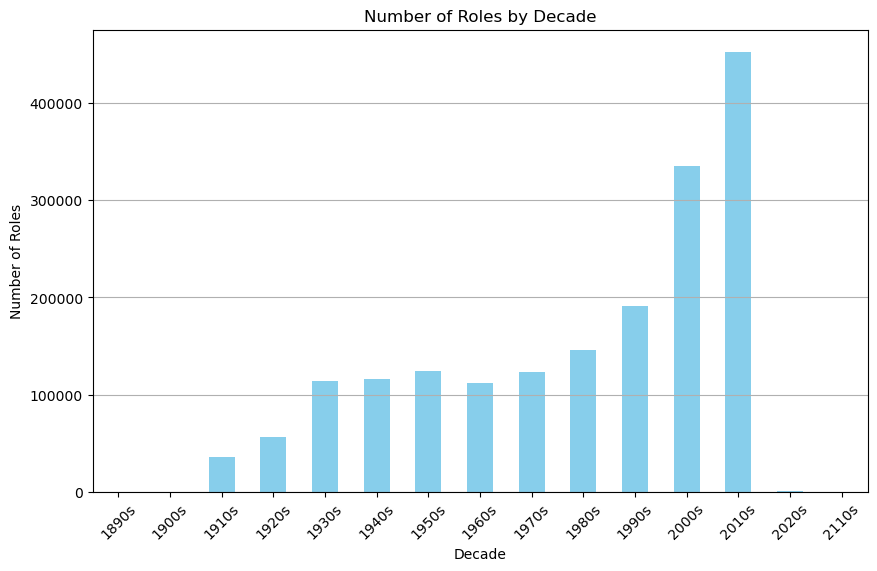

In [49]:
def map_to_decade(year):
    return str(year // 10 * 10) + "s"

cast['decade'] = cast['year'].apply(map_to_decade)

roles_by_decade = cast.groupby('decade')['character'].nunique()

plt.figure(figsize=(10, 6))
roles_by_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Roles by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

It is notable that maximum movies release on Thursdays and Fridays since they can attract weekend audiences with new movies.

In [8]:
release_dates['date'] = pd.to_datetime(release_dates['date'])

release_dates['day_of_week'] = release_dates['date'].dt.day_name()

print(release_dates)

                          title  year      country       date day_of_week
0         #73, Shaanthi Nivaasa  2007        India 2007-06-15      Friday
1                         #BKKY  2016     Cambodia 2017-10-12    Thursday
2                       #Beings  2015      Romania 2015-01-29    Thursday
3                     #Captured  2017          USA 2017-09-05     Tuesday
4        #Ewankosau saranghaeyo  2015  Philippines 2015-01-21   Wednesday
...                         ...   ...          ...        ...         ...
443481  xXx: State of the Union  2005      Uruguay 2005-04-29      Friday
443482  xXx: State of the Union  2005       Poland 2005-06-03      Friday
443483  xXx: State of the Union  2005       Turkey 2005-06-03      Friday
443484  xXx: State of the Union  2005        China 2005-06-17      Friday
443485  xXx: State of the Union  2005       Greece 2005-06-24      Friday

[443486 rows x 5 columns]


In [9]:
release_dates['date'] = pd.to_datetime(release_dates['date'])

pivot_table = pd.pivot_table(release_dates, index=release_dates['date'].dt.day_name(), aggfunc='size')

print(pivot_table)

date
Friday       163174
Monday        37210
Saturday      31332
Sunday        15823
Thursday     125746
Tuesday       16762
Wednesday     53439
dtype: int64


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

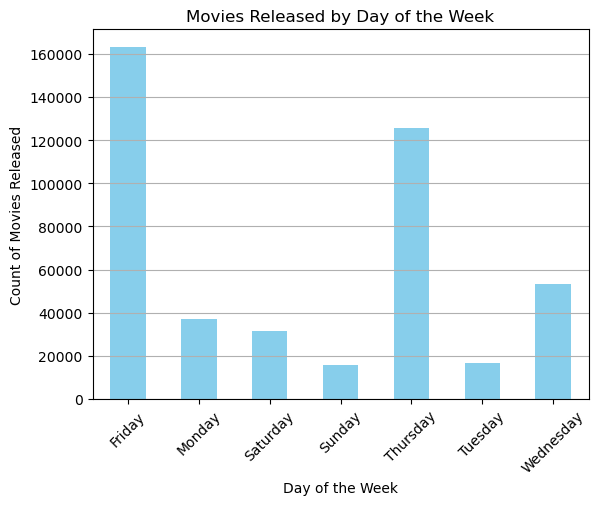

In [10]:
release_dates['date'] = pd.to_datetime(release_dates['date'])

pivot_table = pd.pivot_table(release_dates, index=release_dates['date'].dt.day_name(), aggfunc='size')

pivot_table.plot(kind='bar', color='skyblue')
plt.title('Movies Released by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Movies Released')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

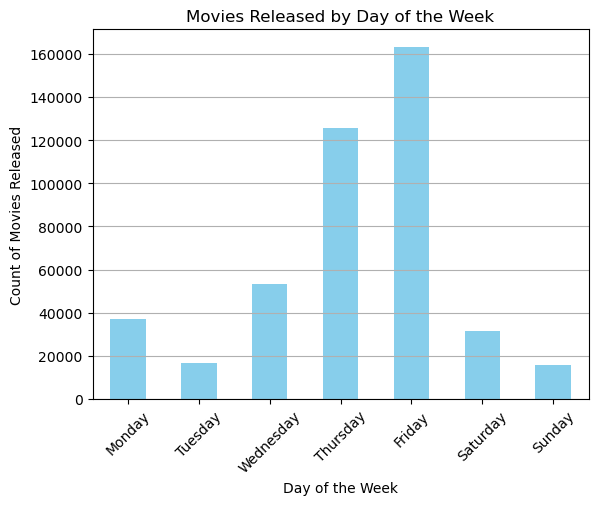

In [11]:
release_dates['date'] = pd.to_datetime(release_dates['date'])

pivot_table = pd.pivot_table(release_dates, index=release_dates['date'].dt.day_name(), aggfunc='size')

pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

pivot_table.plot(kind='bar', color='skyblue')
plt.title('Movies Released by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Movies Released')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

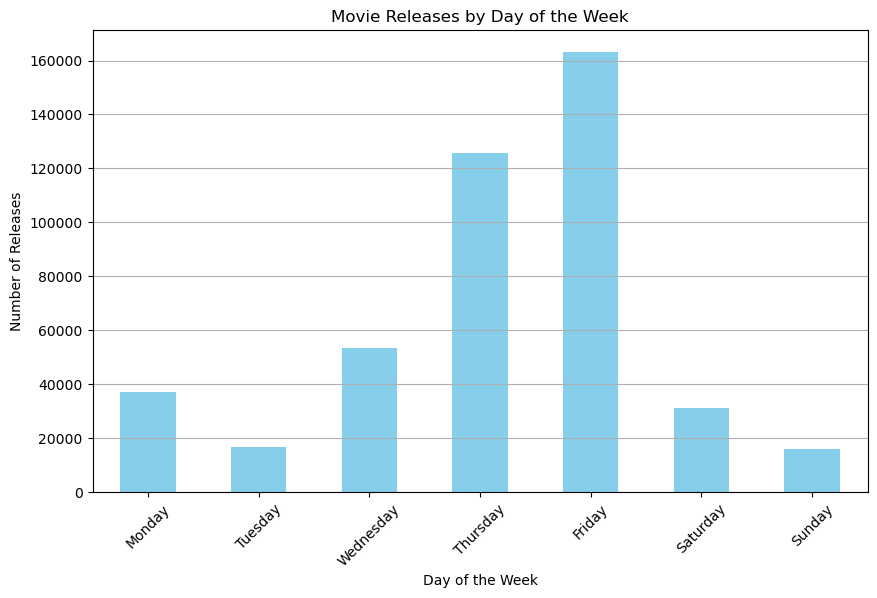

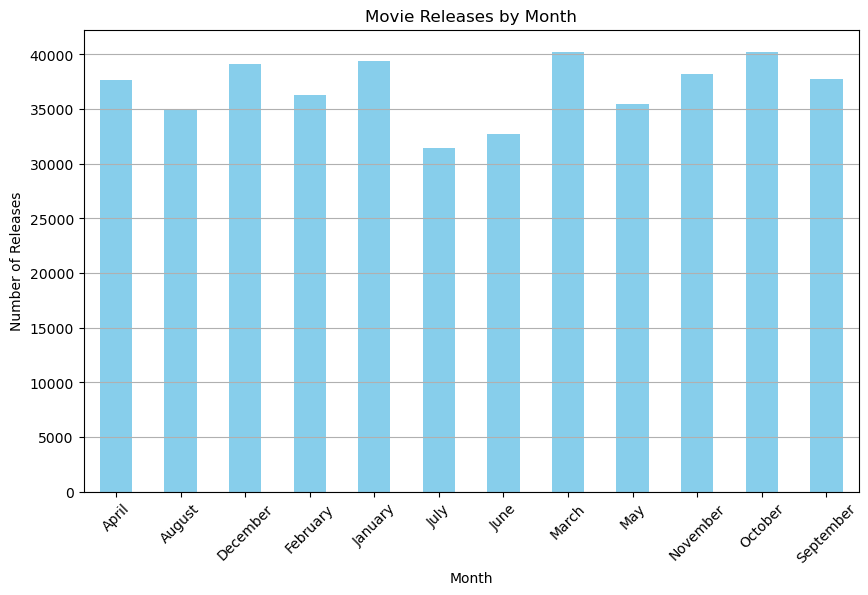

In [6]:
release_dates['date'] = pd.to_datetime(release_dates['date'])

# Extract day of the week and month from the date
release_dates['day_of_week'] = release_dates['date'].dt.day_name()
release_dates['month'] = release_dates['date'].dt.month_name()

# Create a pivot table to count the number of movies released on each day of the week
pivot_day_of_week = pd.pivot_table(release_dates, index='day_of_week', aggfunc='size')

# Create a pivot table to count the number of movies released in each month
pivot_month = pd.pivot_table(release_dates, index='month', aggfunc='size')

# Plot the distribution of movie releases by day of the week
plt.figure(figsize=(10, 6))
pivot_day_of_week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='skyblue')
plt.title('Movie Releases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot the distribution of movie releases by month
plt.figure(figsize=(10, 6))
pivot_month.plot(kind='bar', color='skyblue')
plt.title('Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [50]:
star_wars_actors = cast[(cast['title'] == 'Star Wars')]

star_wars_actor_names = star_wars_actors['name'].unique()

actors_other_films = cast[cast['name'].isin(star_wars_actor_names)]

actors_other_films = actors_other_films[actors_other_films['title'] != 'Star Wars']


other_films = actors_other_films['title'].unique()

print("Films actors in 'Star Wars' went on to appear in:")
print(other_films)

Films actors in 'Star Wars' went on to appear in:
['Every Little Crook and Nanny' 'Linda Lovelace for President' 'Rogue One'
 'Smorgasbord' 'The Roommates' 'The Sting II' 'The Student Body'
 'The Zebra Force' "Adventures of a Plumber's Mate"
 'Adventures of a Private Eye' 'Adventures of a Taxi Driver'
 'Alfie Darling' 'Big Zapper' 'Eskimo Nell' 'Hennessy'
 'Licensed to Love and Kill' 'The Deadly Females' 'The Fast Kill'
 'The Night My Number Came Up' 'The Swordsman' 'Track the Man Down'
 '24 Hour Party People' 'Amadeus' 'Flash Gordon' 'Labyrinth' 'Mona Lisa'
 'Sleeping Beauty' 'Star Wars: Episode I - The Phantom Menace'
 'Star Wars: Episode II - Attack of the Clones'
 'Star Wars: Episode III - Revenge of the Sith'
 'Star Wars: Episode V - The Empire Strikes Back'
 'Star Wars: Episode VI - Return of the Jedi' 'The Elephant Man'
 'The King and I' 'Time Bandits' 'U.F.O.' 'Willow' 'Wombling Free'
 'American Graffiti' 'Bizarre Devices'
 "Bon Voyage, Charlie Brown (and Don't Come Back!!)" 'B